In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# **1. <span style='color:#E1B12D'>LOAD DATA </span>**

In [ ]:
# Download data from ICU
!gdown --id 1pBMw5tlmRBMP4U390vEAJE_EIlbgkp_q

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pBMw5tlmRBMP4U390vEAJE_EIlbgkp_q
To: /content/bank-additional-full.csv
100% 4.93M/4.93M [00:00<00:00, 49.8MB/s]



## **<span style='color:#E1B12D'>Detailed Data </span>**

**Input Variables:**
- Bank client data:
   - age (numeric)
   - job: type of job (categorical)
   - marital: marital status (categorical)
   - education (categorical)
   - default: has credit in default? (categorical)
   - housing: has a housing loan? (categorical)
   - loan: has a personal loan? (categorical)
- Related to the last contact of the current campaign:
   - contact: type of communication contact (categorical)
   - month: last contact month of the year (categorical)
   - day_of_week: last contact day of the week (categorical)
   - duration: last contact duration, in seconds (numeric)
- Other attributes:
   - campaign: number of contacts performed during this campaign for this client (numeric)
   - pdays: number of days since the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted)
   - previous: number of contacts performed before this campaign for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical)
- Social and economic context attributes:
   - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   - cons.price.idx: consumer price index - monthly indicator (numeric)     
   - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   - euribor3m: 3-month Euribor rate - daily indicator (numeric)
   - nr.employed: number of employees - quarterly indicator (numeric)

**Output Variable (Desired Target):**
   - y - has the client subscribed to a term deposit? (binary)

**8. Missing Attribute Values:** There are some missing values in several categorical attributes, all encoded with the label "unknown." These missing values can be treated as a possible class label or handled using deletion or imputation techniques.

In [ ]:
# Configuring Pandas to Display All Columns
pd.set_option('display.max_columns', None)

df2 = pd.read_csv('bank-additional-full.csv', delimiter= ',')
df2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **2. <span style='color:#E1B12D'>EDA & PRE-PROCESSING </span>**

## **2.1 <span style='color:#E1B12D'>Data Dictionary</span>**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## **2.2 <span style='color:#E1B12D'>Handle Null Values</span>**

In [ ]:
# Check for Missing Values and Display the Results
print(df2.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Explanation**

The null values in this dataset are represented as "unknown".

In [ ]:
# Counting the number of 'unknown' values in each column
unknown_counts = (df2 == 'unknown').sum()
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In this dataset, several `unknown` values have been identified as missing values in the `job`, `marital`, `education`, `default`, `housing`, and `loan` columns. Based on the information confirmed from the following link: [Google Drive](https://drive.google.com/file/d/1kkOh83wgDZDAdevFmeRAUsYbSH7oqzxx/view?usp=sharing), these `unknown` values indeed represent missing values that cannot be imputed with specific values such as the mode or other alternatives. Since imputing the `unknown` values with other values could compromise the integrity of the data, it has been decided to remove these values. Furthermore, the column with the highest number of `unknown` values, the `education` column, only accounts for about 4.2% of the total data, meaning that removing these values will not significantly reduce the amount of data available for further analysis.

In [ ]:
# List of columns that may contain 'unknown' values
columns_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Remove rows that contain 'unknown' values in the specified columns
df2 = df2[~df2[columns_with_unknown].apply(lambda x: x.str.contains('unknown')).any(axis=1)]

# Display the number of rows after removal
print(f"Number of rows after removal: {len(df2)}")


Number of rows after removal: 30488


In [ ]:
# Counting the number of 'unknown' values in each column
unknown_counts = (df2 == 'unknown').sum()
print(unknown_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## **2.3 <span style='color:#E1B12D'>Handle Duplicate Values</span>**

In [ ]:
# Check for duplicated rows
duplicates = df2.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

Duplicated rows: 10


In [ ]:
# Removing duplicate rows
df2 = df2.drop_duplicates()

In [ ]:
# Check for duplicated rows
duplicates = df2.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

Duplicated rows: 0


## **2.4 <span style='color:#E1B12D'>Features Engineering</span>**

### **2.4.1 <span style='color:#E1B12D'>Binned Age </span>**

**New Column**: `age_bin`

**Reason**: This age grouping is designed to simplify the analysis of different behavioral patterns across age groups. With this categorization, we can more easily understand differences in preferences or responses to the bank's deposit campaign based on age. It also helps in simplifying the data for deeper analysis and facilitates the identification of more relevant market segments.

In [ ]:
# Define bins and labels according to age categories
bins = [0, 17, 29, 39, 49, 59, np.inf]  # Age ranges, including values beyond 59
labels = ['Child', 'Young', 'Adult', 'Mature Adult', 'Old', 'Senior']  # Labels for the bins

# Add the 'age_bin' column based on bins
df2['age_bin'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to check the results
print(df2[['age', 'age_bin']].head())


   age       age_bin
0   56           Old
2   37         Adult
3   40  Mature Adult
4   56           Old
6   59        Senior


In [ ]:
# Display unique values in the 'age' column
unique_ages = df2['age'].unique()

# Menampilkan hasilnya
print("Unique values in the 'age' column:")
print(unique_ages)


Unique values in the 'age' column:
[56 37 40 59 24 25 29 57 35 50 30 55 41 54 34 52 32 38 45 39 60 53 51 48
 44 31 49 33 42 36 43 46 28 58 27 47 26 22 23 20 21 18 70 61 66 76 67 73
 88 95 19 68 75 63 62 65 72 64 71 69 78 85 80 79 77 83 81 74 82 17 87 91
 94 86 84 89]


### **2.4.2 <span style='color:#E1B12D'> Job, Marital, & education Interaction </span>**

**Bivariate Interaction**

**a. Interaction between `job` and `marital`**
- **New Column**: `job_marital_interaction`
- **Description**: Combines information from the `job` and `marital` columns to examine how the combination of job type and marital status influences a person’s decision to make a deposit. For example, whether someone with a particular job and marital status is more likely to make a deposit.
- **Reason**: The combination of job type and marital status may jointly influence financial decisions, providing insights into behavioral tendencies regarding deposits.

**b. Interaction between `job` and `education`**
- **New Column**: `job_education_interaction`
- **Description**: Combines information from the `job` and `education` columns to analyze how the combination of job type and education level influences the decision to make a deposit. This helps in understanding if education level and job type together affect financial decisions.
- **Reason**: Job type and education level may impact financial decisions, such as the likelihood of making a deposit.

**c. Interaction between `marital` and `education`**
- **New Column**: `marital_education_interaction`
- **Description**: Combines information from the `marital` and `education` columns to evaluate how the combination of marital status and education level affects the decision to make a deposit.
- **Reason**: Marital status and education can mutually influence financial decisions, such as making a deposit.

---

**Multivariate Interaction**

**a. Interaction between `job`, `marital`, and `education`**
- **New Column**: `job_marital_education_interaction`
- **Description**: Combines information from the `job`, `marital`, and `education` columns to capture how the combination of these three features together affects a person’s decision to make a deposit.
- **Reason**: The combination of job, marital status, and education can provide a more comprehensive view of the factors influencing the decision to make a deposit.

In [ ]:
# Adding interaction features and saving them in a new DataFrame df2
df2['job_marital_interaction'] = df2['job'] + '_' + df2['marital']
df2['job_education_interaction'] = df2['job'] + '_' + df2['education']
df2['marital_education_interaction'] = df2['marital'] + '_' + df2['education']
df2['job_marital_education_interaction'] = df2['job'] + '_' + df2['marital'] + '_' + df2['education']

# Displaying the DataFrame df2 with the new features
df2.sample(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,job_marital_interaction,job_education_interaction,marital_education_interaction,job_marital_education_interaction
21766,30,technician,single,professional.course,no,yes,no,cellular,aug,wed,129,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,Adult,technician_single,technician_professional.course,single_professional.course,technician_single_professional.course
38999,50,technician,married,high.school,no,no,no,cellular,dec,mon,620,3,999,0,nonexistent,-3.0,92.713,-33.0,0.717,5023.5,yes,Old,technician_married,technician_high.school,married_high.school,technician_married_high.school
30427,24,student,single,high.school,no,no,yes,cellular,apr,thu,157,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,Young,student_single,student_high.school,single_high.school,student_single_high.school


### **2.4.3 <span style='color:#E1B12D'>Default, Housing, & loan Interaction </span>**

**Bivariate Interaction**

**a. Interaction between `default` and `housing`**
- **New Column**: `default_housing_interaction`
- **Description**: Combines information from the `default` column (whether the customer has credit in default) and the `housing` column (whether the customer has a housing loan) to analyze how this combination influences a person’s decision to make a deposit. For example, whether customers with credit in default and a housing loan are more or less likely to make a deposit.
- **Reason**: Credit default status and housing loan ownership can jointly affect a person’s ability and tendency to save money in the form of deposits.

**b. Interaction between `default` and `loan`**
- **New Column**: `default_loan_interaction`
- **Description**: Combines information from the `default` and `loan` (whether the customer has a personal loan) columns to evaluate how this combination influences the decision to make a deposit. For example, whether customers with credit in default and a personal loan show different tendencies in making deposits compared to those who do not.
- **Reason**: The combination of credit default status and personal loan ownership can provide insights into the customer’s financial risk and saving capacity.

**c. Interaction between `housing` and `loan`**
- **New Column**: `housing_loan_interaction`
- **Description**: Combines information from the `housing` and `loan` columns to examine how owning both a housing loan and a personal loan simultaneously affects the decision to make a deposit. For example, whether having both types of loans reduces the tendency to save.
- **Reason**: Having multiple types of loans may impact a person’s liquidity and financial capacity, which in turn may influence their decision to make a deposit.

---

**Multivariate Interaction**

**a. Interaction between `default`, `housing`, and `loan`**
- **New Column**: `default_housing_loan_interaction`
- **Description**: Combines information from the `default`, `housing`, and `loan` columns to capture how the combination of these three factors together influences a person’s decision to make a deposit. For example, whether customers with credit in default and both types of loans are more or less likely to make a deposit compared to others.
- **Reason**: The combination of credit default status and the ownership of multiple types of loans can provide a more complete picture of a customer’s risk profile and financial capacity, which is crucial in understanding their behavior related to deposits.

In [ ]:
# Adding interaction features
df2['default_housing_interaction'] = df2['default'] + '_' + df2['housing']
df2['default_loan_interaction'] = df2['default'] + '_' + df2['loan']
df2['housing_loan_interaction'] = df2['housing'] + '_' + df2['loan']
df2['default_housing_loan_interaction'] = df2['default'] + '_' + df2['housing'] + '_' + df2['loan']

# Displaying the DataFrame with the new features
df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,job_marital_interaction,job_education_interaction,marital_education_interaction,job_marital_education_interaction,default_housing_interaction,default_loan_interaction,housing_loan_interaction,default_housing_loan_interaction
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Old,housemaid_married,housemaid_basic.4y,married_basic.4y,housemaid_married_basic.4y,no_no,no_no,no_no,no_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,services_married,services_high.school,married_high.school,services_married_high.school,no_yes,no_no,yes_no,no_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mature Adult,admin._married,admin._basic.6y,married_basic.6y,admin._married_basic.6y,no_no,no_no,no_no,no_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Old,services_married,services_high.school,married_high.school,services_married_high.school,no_no,no_yes,no_yes,no_no_yes
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,admin._married,admin._professional.course,married_professional.course,admin._married_professional.course,no_no,no_no,no_no,no_no_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Senior,retired_married,retired_professional.course,married_professional.course,retired_married_professional.course,no_yes,no_no,yes_no,no_yes_no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Mature Adult,blue-collar_married,blue-collar_professional.course,married_professional.course,blue-collar_married_professional.course,no_no,no_no,no_no,no_no_no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Old,retired_married,retired_university.degree,married_university.degree,retired_married_university.degree,no_yes,no_no,yes_no,no_yes_no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Mature Adult,technician_married,technician_professional.course,married_professional.course,technician_married_professional.course,no_no,no_no,no_no,no_no_no


### **2.4.4 <span style='color:#E1B12D'>Duration previous interaction </span>**

**New Column: duration_prev_interaction**

- **Description**: This feature represents the ratio between the last contact duration (`duration`) and the number of previous contacts (`previous`). In the calculation, 1 is added to the `previous` column to avoid division by zero, which could cause errors in the calculation.

- **Reason**: This feature is designed to measure how effective previous contacts were in extending the duration of the current interaction. For example, if the last contact duration is quite long but the number of previous contacts is low, this ratio will be high, indicating that the previous contacts may have been highly effective in maintaining a longer interaction. Conversely, a low ratio could indicate that the previous contacts were less successful in extending the interaction duration.

In [ ]:
# Adding interaction features
df2['duration_prev_interaction'] = df2['duration'] / (df2['previous'] + 1)  # Adding 1 to avoid division by zerool


In [ ]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,job_marital_interaction,job_education_interaction,marital_education_interaction,job_marital_education_interaction,default_housing_interaction,default_loan_interaction,housing_loan_interaction,default_housing_loan_interaction,duration_prev_interaction
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Old,housemaid_married,housemaid_basic.4y,married_basic.4y,housemaid_married_basic.4y,no_no,no_no,no_no,no_no_no,261.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adult,services_married,services_high.school,married_high.school,services_married_high.school,no_yes,no_no,yes_no,no_yes_no,226.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Mature Adult,admin._married,admin._basic.6y,married_basic.6y,admin._married_basic.6y,no_no,no_no,no_no,no_no_no,151.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Old,services_married,services_high.school,married_high.school,services_married_high.school,no_no,no_yes,no_yes,no_no_yes,307.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,admin._married,admin._professional.course,married_professional.course,admin._married_professional.course,no_no,no_no,no_no,no_no_no,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Senior,retired_married,retired_professional.course,married_professional.course,retired_married_professional.course,no_yes,no_no,yes_no,no_yes_no,334.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Mature Adult,blue-collar_married,blue-collar_professional.course,married_professional.course,blue-collar_married_professional.course,no_no,no_no,no_no,no_no_no,383.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Old,retired_married,retired_university.degree,married_university.degree,retired_married_university.degree,no_yes,no_no,yes_no,no_yes_no,189.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Mature Adult,technician_married,technician_professional.course,married_professional.course,technician_married_professional.course,no_no,no_no,no_no,no_no_no,442.0


### **2.4.5 <span style='color:#E1B12D'>Date Quarter </span>**

**New Column: contact_quarter**

**Description**: This feature indicates the quarter of the year based on the `month` column. Using the contact month information, this feature converts the month into the relevant quarter (Q1, Q2, Q3, Q4). For example, January, February, and March fall into the first quarter (Q1), while April, May, and June fall into the second quarter (Q2), and so on.

**Reason**: Identifying the quarter from the contact month provides additional insight into the timing of when offers or campaigns were made. Offers made in a specific quarter may have different effects compared to other quarters. For example, campaigns conducted at the end of the fiscal year (Q4) might face different dynamics compared to those carried out at the beginning of the year (Q1). This feature helps in analyzing seasonal patterns and their impact on campaign outcomes.

In [ ]:
# Adding a quarter column
df2['contact_quarter'] = pd.to_datetime(df2['month'], format='%b').dt.quarter


### **2.4.6 <span style='color:#E1B12D'>Correlation Between Economic Factors </span>**

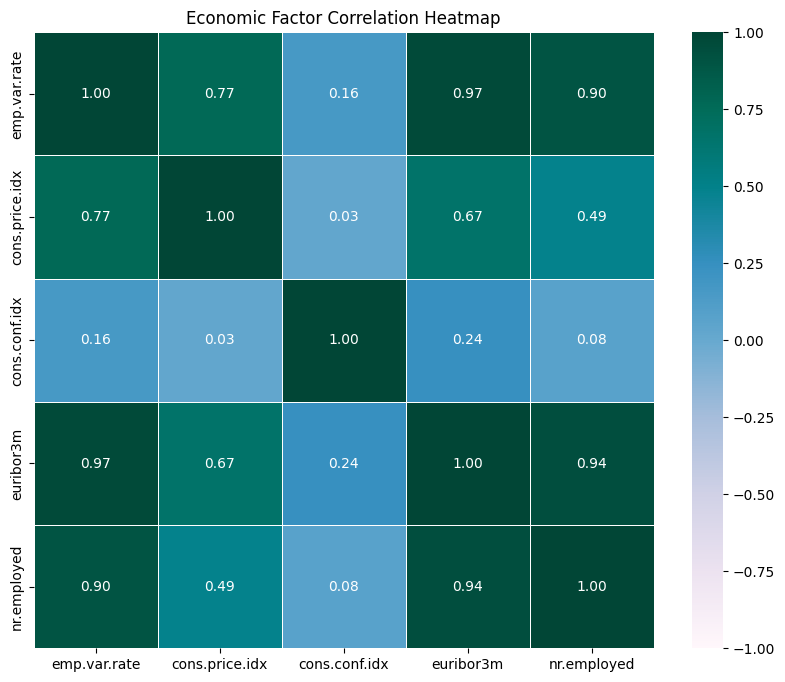

In [ ]:
# Select relevant columns
columns_of_interest = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Select a data subset
df_subset = df2[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Economic Factor Correlation Heatmap')
plt.show()


From the heatmap, it is evident that there is significant correlation among several economic factors. This correlation is understandable because economic factors often influence each other. For instance, the employment variation rate (`emp.var.rate`) can affect the consumer price index (`cons.price.idx`) as large changes in employment can impact purchasing power and the price of goods. Additionally, the 3-month Euribor rate (`euribor3m`) influences borrowing and investment costs, which in turn affects the number of employees (`nr.employed`), and changes in the number of employees can affect employment variation and other related factors that will be discussed further.

However, in the context of modeling, high correlation among these factors can lead to multicollinearity issues, where several independent variables are highly correlated with each other, affecting the stability of the model. Therefore, in modeling, economic factors with high correlation may need to be removed to avoid this issue. For the time being, however, all economic factors are retained for business analysis to understand the broader impact and relationships among variables.

### **2.4.7 <span style='color:#E1B12D'>Economic Factors Binned </span>**

**New Columns: `emp.var.rate_bin`, `cons.price.idx_bin`, `cons.conf.idx_bin`, `euribor3m_bin`, `nr.employed_bin`**

**Description**: These features group the values from the `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed` columns into specific range categories.

**Reason**: This binning simplifies the analysis by grouping continuous values into more manageable categories, making it easier to understand the impact of certain value ranges on the desired outcomes.

In [ ]:
# List of columns to check
columns_to_check = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'age_bin', 'nr.employed']

# Displaying unique values for the specified column
for column in columns_to_check:
    if column in df2.columns:
        unique_values = df2[column].unique()
        print(f"Column: {column}")
        print(f"Unique values: {unique_values}")
        print("-" * 40)
    else:
        print(f"Column {column} not found in the dataset.")


Column: emp.var.rate
Unique values: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
----------------------------------------
Column: cons.price.idx
Unique values: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
----------------------------------------
Column: cons.conf.idx
Unique values: [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
----------------------------------------
Column: euribor3m
Unique values: [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.

In [ ]:
# Define the range and label for each updated column

# For 'emp.var.rate'
bins_emp_var_rate = [-np.inf, -3, -2, 0, 1, np.inf]
labels_emp_var_rate = ['< -3', '-3 - (-2)', '-2 - 0', '0 - 1', '> 1']

# For 'cons.price.idx'
bins_cons_price_idx = [92, 93, 94, 95]
labels_cons_price_idx = ['92 - 93', '93 - 94', '94 - 95']

# For 'cons.conf.idx'
bins_cons_conf_idx = [-np.inf, -55, -50, -45, -40, -35, -30, np.inf]
labels_cons_conf_idx = ['< -55', '-55 - (-50)', '-50 - (-45)', '-45 - (-40)', '-40 - (-35)', '-35 - (-30)', '> -30']

# For 'euribor3m'
bins_euribor3m = [0, 1, 3, 4.5, np.inf]
labels_euribor3m = ['0 - 1', '1 - 3', '3 - 4.5', '> 4.5']

# For 'nr.employed'
bins_nr_employed = [0, 4900, 5000, 5100, 5200, 5300, np.inf]
labels_nr_employed = ['< 4900', '4900 - 5000', '5000 - 5100', '5100 - 5200', '5200 - 5300', '> 5300']

# Perform binning on each column with inclusive upper bounds (right=True)
df2['emp.var.rate_bin'] = pd.cut(df2['emp.var.rate'], bins=bins_emp_var_rate, labels=labels_emp_var_rate, right=True, include_lowest=True)
df2['cons.price.idx_bin'] = pd.cut(df2['cons.price.idx'], bins=bins_cons_price_idx, labels=labels_cons_price_idx, right=True, include_lowest=True)
df2['cons.conf.idx_bin'] = pd.cut(df2['cons.conf.idx'], bins=bins_cons_conf_idx, labels=labels_cons_conf_idx, right=True, include_lowest=True)
df2['euribor3m_bin'] = pd.cut(df2['euribor3m'], bins=bins_euribor3m, labels=labels_euribor3m, right=True, include_lowest=True)
df2['nr.employed_bin'] = pd.cut(df2['nr.employed'], bins=bins_nr_employed, labels=labels_nr_employed, right=True, include_lowest=True)

# Display the results using display
display(df2[['emp.var.rate', 'emp.var.rate_bin']].head())
display(df2[['cons.price.idx', 'cons.price.idx_bin']].head())
display(df2[['cons.conf.idx', 'cons.conf.idx_bin']].head())
display(df2[['euribor3m', 'euribor3m_bin']].head())
display(df2[['nr.employed', 'nr.employed_bin']].head())


,emp.var.rate,emp.var.rate_bin
0,1.1,> 1
2,1.1,> 1
3,1.1,> 1
4,1.1,> 1
6,1.1,> 1


,cons.price.idx,cons.price.idx_bin
0,93.994,93 - 94
2,93.994,93 - 94
3,93.994,93 - 94
4,93.994,93 - 94
6,93.994,93 - 94


,cons.conf.idx,cons.conf.idx_bin
0,-36.4,-40 - (-35)
2,-36.4,-40 - (-35)
3,-36.4,-40 - (-35)
4,-36.4,-40 - (-35)
6,-36.4,-40 - (-35)


,euribor3m,euribor3m_bin
0,4.857,> 4.5
2,4.857,> 4.5
3,4.857,> 4.5
4,4.857,> 4.5
6,4.857,> 4.5


,nr.employed,nr.employed_bin
0,5191.0,5100 - 5200
2,5191.0,5100 - 5200
3,5191.0,5100 - 5200
4,5191.0,5100 - 5200
6,5191.0,5100 - 5200


In [ ]:
# Checking for missing values in each column
missing_values = df2.isna().sum()

# Displaying columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


# **2. <span style='color:#E1B12D'>SAVED DATA </span>**

**Explanation:**

After completing the EDA and preprocessing stages on the `df2` dataset, the next step is to save the processed results into a file. This facilitates deeper analysis and extraction of business insights in a separate notebook. Saving the data in CSV format allows for loading the processed data without having to repeat previous steps, making the business insights analysis process more organized and efficient.

In [ ]:
df2.to_csv('df2_processed(2).csv', index=False)